In [2]:
from ucimlrepo import fetch_ucirepo
from implementations import bayes
from implementations import id3
from implementations import random_forest
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from typing import Tuple
import pandas as pd
import time
import importlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
wine_quality = fetch_ucirepo(id=186) 
  
X = np.array(wine_quality.data.features)
y = np.array(wine_quality.data.targets.quality) 

def reassign_classes(y: np.ndarray) -> np.ndarray:
    new_y = []
    for current_class in y:
        if current_class > 5:
            new_y.append(1)
        else:
            new_y.append(0)
    return new_y

y = reassign_classes(y)

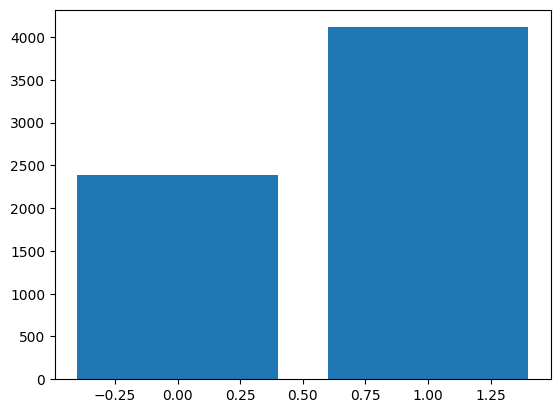

In [7]:
c = Counter()
c.update(y)
plt.bar([x for x in range(2)], c.values())
plt.show()

[5.32756810e-06 1.18282844e-05] 1
[5.72040828e-09 5.13109402e-07] 1
[7.92154108e-07 6.53450956e-08] 0
[1.62541993e-05 7.10408019e-06] 0
[9.27803018e-09 1.29978828e-06] 1
[7.54999603e-05 9.78521562e-05] 0
[1.48435044e-06 6.76112553e-06] 1
[6.99223003e-06 7.52325050e-06] 1
[1.31272276e-08 6.45480077e-10] 1
[3.29693293e-07 4.03689421e-08] 0
[4.80223587e-05 4.23241732e-05] 1
[2.30142173e-07 2.18498449e-06] 1
[1.10818454e-06 7.88001602e-06] 1
[2.92273255e-08 5.20271466e-09] 1
[4.53277967e-07 2.37534979e-08] 1
[7.46617335e-09 1.35722191e-08] 0
[4.13354659e-08 8.83924408e-06] 1
[1.38725084e-08 2.44519993e-09] 0
[1.94416245e-06 3.42071924e-07] 1
[3.61013682e-07 2.69658339e-06] 1
[4.62389869e-06 8.70014026e-05] 0
[2.28123334e-10 2.25934781e-07] 1
[3.45277222e-07 1.75819590e-06] 1
[1.15562191e-06 1.26670738e-07] 0
[9.03692098e-08 5.51070612e-08] 0
[2.83803418e-07 1.25664064e-05] 1
[0.00000000e+00 7.34016994e-13] 0
[3.88798288e-07 5.32369170e-08] 0
[5.33951179e-08 1.65993069e-05] 1
[3.70813871e-0

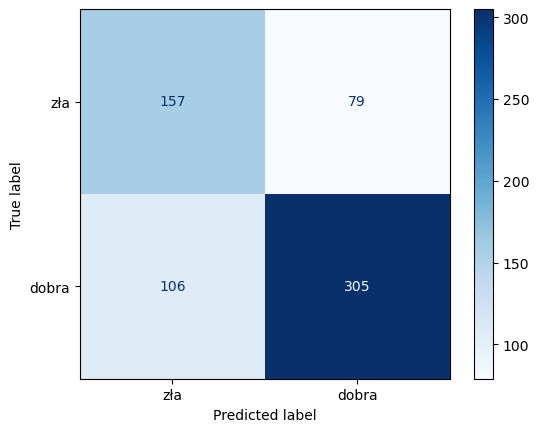

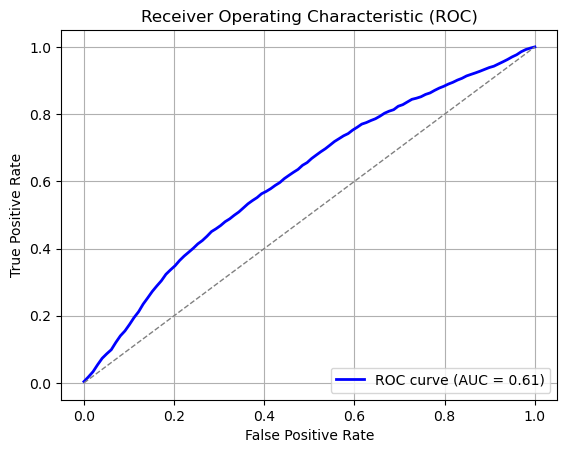

In [4]:
#################### BAYES
importlib.reload(random_forest)
accuracies = []
time1 = time.time()

fpr_list = []
tpr_list = []
auc_list = []
y_testing = []
y_pred = []
for licznik in range(25):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random.randrange(200))
    bay = bayes.NaiveBayes()
    bay.fit(x_train, y_train)

    samples = len(y_test)
    correctly_predicted = 0
    scores = [] #####################
    for sample, gt in zip(x_test, y_test):
        prediction = bay.predict(sample)
        scores.append(prediction[1]) #############333
        y_pred.append(np.argmax(prediction))
        y_testing.append(gt)
        print(prediction, gt)
        if np.argmax(prediction) == gt:
            correctly_predicted += 1

    fpr, tpr, _ = roc_curve(y_test, scores)
    roc_auc = auc(fpr, tpr)
    # y_pred = np.array(y_pred)

    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(roc_auc)
    # y_pred = np.array(y_pred)

    print(f"Accuracy: {(correctly_predicted / samples) * 100:.2f}%")
    print(f"Elapsed time: {time.time()-time1:.2f} s")
    accuracies.append((correctly_predicted / samples) * 100)
    print(f"Próbka numer {licznik+1}")
print(f"Mean accuracy: {np.mean(accuracies):.2f}%")
print(f"Accuracy min: {min(accuracies):.2f}%, max: {max(accuracies):.2f}%")
print(f"Accuracy standard deviation: {np.std(accuracies):.2f}%")



cm = confusion_matrix(y_testing, y_pred, labels=[0, 1])
cm = cm//25
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["zła", "dobra"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


# Define a common set of FPR values
mean_fpr = np.linspace(0, 1, 100)

# Interpolate TPR values
tpr_interp = [np.interp(mean_fpr, fpr, tpr) for fpr, tpr in zip(fpr_list, tpr_list)]

# Average the interpolated TPR values
mean_tpr = np.mean(tpr_interp, axis=0)

# Compute the mean AUC
mean_auc = np.mean(auc_list)


# Plot ROC curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

[1. 0.] 0
[0.2 0.8] 1
[0.17910448 0.82089552] 1
[0.9122807 0.0877193] 0
[0. 1.] 1
[0.41071429 0.58928571] 0
[0. 1.] 1
[0.87777778 0.12222222] 0
[1. 0.] 1
[0. 1.] 1
[0. 1.] 1
[1. 0.] 0
[0. 1.] 0
[0.81196581 0.18803419] 0
[1. 0.] 1
[0. 1.] 1
[1. 0.] 1
[0.46875 0.53125] 1
[0. 1.] 0
[0.81196581 0.18803419] 0
[0. 1.] 1
[0.47435897 0.52564103] 0
[0.22222222 0.77777778] 1
[0. 1.] 1
[0.81196581 0.18803419] 1
[0. 1.] 1
[0.2195122 0.7804878] 1
[0.53333333 0.46666667] 1
[0.60215054 0.39784946] 0
[0. 1.] 1
[1. 0.] 0
[0. 1.] 1
[0.22222222 0.77777778] 1
[0.60215054 0.39784946] 0
[1. 0.] 0
[0. 1.] 1
[0. 1.] 1
[1. 0.] 1
[0.19277108 0.80722892] 1
[0.02040816 0.97959184] 1
[0.47435897 0.52564103] 1
[0.13636364 0.86363636] 1
[0. 1.] 1
[0.39130435 0.60869565] 0
[1. 0.] 0
[0. 1.] 1
[1. 0.] 0
[0.60215054 0.39784946] 0
[1. 0.] 0
[0.81196581 0.18803419] 0
[0.19277108 0.80722892] 1
[0.81196581 0.18803419] 0
[0.54545455 0.45454545] 0
[0. 1.] 1
[0. 1.] 1
[0. 1.] 0
[0. 1.] 1
[0.79310345 0.20689655] 0
[0. 1.] 1
[0

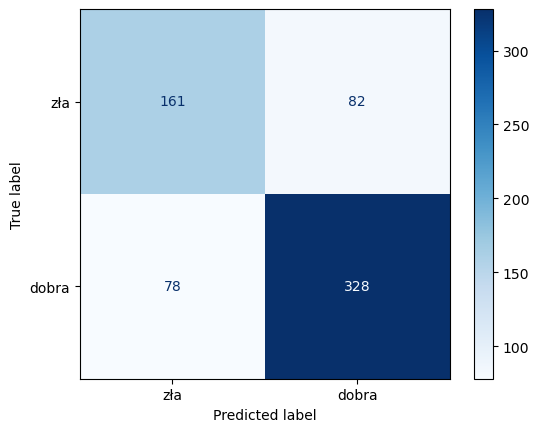

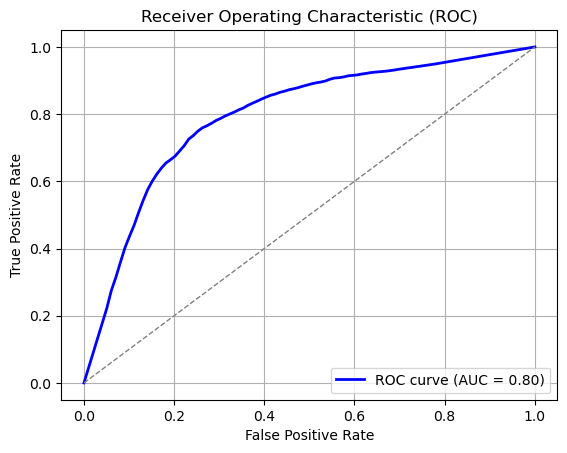

In [5]:
#################### ID3
importlib.reload(random_forest)
accuracies = []
time1 = time.time()


fpr_list = []
tpr_list = []
auc_list = []
y_testing = []
y_pred = []
for licznik in range(25):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random.randrange(200))
    tree = id3.DecisionTreeClassifier(10)
    tree.fit(x_train, y_train)

    samples = len(y_test)
    correctly_predicted = 0
    scores = [] #####################
    for sample, gt in zip(x_test, y_test):
        prediction = tree.predict(sample)
        scores.append(prediction[1]) #############333
        y_pred.append(np.argmax(prediction))
        y_testing.append(gt)
        print(prediction, gt)
        if np.argmax(prediction) == gt:
            correctly_predicted += 1

    fpr, tpr, _ = roc_curve(y_test, scores)
    roc_auc = auc(fpr, tpr)
    # y_pred = np.array(y_pred)

    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(roc_auc)

    print(f"Accuracy: {(correctly_predicted / samples) * 100:.2f}%")
    print(f"Elapsed time: {time.time()-time1:.2f} s")
    accuracies.append((correctly_predicted / samples) * 100)
    print(f"Próbka numer {licznik+1}")
print(f"Mean accuracy: {np.mean(accuracies):.2f}%")
print(f"Accuracy min: {min(accuracies):.2f}%, max: {max(accuracies):.2f}%")
print(f"Accuracy standard deviation: {np.std(accuracies):.2f}%")



cm = confusion_matrix(y_testing, y_pred, labels=[0, 1])
cm = cm//25
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["zła", "dobra"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


# Define a common set of FPR values
mean_fpr = np.linspace(0, 1, 100)

# Interpolate TPR values
tpr_interp = [np.interp(mean_fpr, fpr, tpr) for fpr, tpr in zip(fpr_list, tpr_list)]

# Average the interpolated TPR values
mean_tpr = np.mean(tpr_interp, axis=0)

# Compute the mean AUC
mean_auc = np.mean(auc_list)


# Plot ROC curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [1]:
#################### RANDOM FOREST ID3 100%
importlib.reload(random_forest)
accuracies = []
time1 = time.time()

fpr_list = []
tpr_list = []
auc_list = []
y_testing = []
y_pred = []
for licznik in range(25):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random.randrange(200))
    rfc = random_forest.RandomForestClassifier(classifiers_number=50)
    rfc.fit(x_train, y_train, tree_percentage=1.0)

    samples = len(y_test)
    correctly_predicted = 0
    scores = [] #####################
    for sample, gt in zip(x_test, y_test):
        prediction = rfc.predict(sample)
        scores.append(prediction[1]) #############333
        y_pred.append(np.argmax(prediction))
        y_testing.append(gt)
        print(prediction, gt)
        if np.argmax(prediction) == gt:
            correctly_predicted += 1

    fpr, tpr, _ = roc_curve(y_test, scores)
    roc_auc = auc(fpr, tpr)
    # y_pred = np.array(y_pred)

    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(roc_auc)
    print(f"Accuracy: {(correctly_predicted / samples) * 100:.2f}%")
    print(f"Elapsed time: {time.time()-time1:.2f} s")
    accuracies.append((correctly_predicted / samples) * 100)
    print(f"Próbka numer {licznik+1}")
print(f"Mean accuracy: {np.mean(accuracies):.2f}%")
print(f"Accuracy min: {min(accuracies):.2f}%, max: {max(accuracies):.2f}%")
print(f"Accuracy standard deviation: {np.std(accuracies):.2f}%")



cm = confusion_matrix(y_testing, y_pred, labels=[0, 1])
cm = cm//25
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["zła", "dobra"])
disp.plot(cmap=plt.cm.Blues)
plt.show()



# Define a common set of FPR values
mean_fpr = np.linspace(0, 1, 100)

# Interpolate TPR values
tpr_interp = [np.interp(mean_fpr, fpr, tpr) for fpr, tpr in zip(fpr_list, tpr_list)]

# Average the interpolated TPR values
mean_tpr = np.mean(tpr_interp, axis=0)

# Compute the mean AUC
mean_auc = np.mean(auc_list)


# Plot ROC curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

NameError: name 'importlib' is not defined

[0.22 0.78] 0
[0.54 0.46] 0
[0.18 0.82] 0
[0.16 0.84] 1
[0.74 0.26] 0
[0.76 0.24] 0
[0.14 0.86] 1
[0.56 0.44] 1
[0.48 0.52] 1
[0.2 0.8] 1
[0.8 0.2] 1
[0.32 0.68] 1
[0.08 0.92] 1
[0.86 0.14] 0
[0.04 0.96] 1
[0.08 0.92] 1
[0.24 0.76] 1
[0.68 0.32] 0
[0.06 0.94] 1
[0.72 0.28] 1
[0.2 0.8] 1
[0.78 0.22] 0
[0.92 0.08] 0
[0.12 0.88] 1
[0.06 0.94] 1
[0.46 0.54] 1
[0. 1.] 1
[0.8 0.2] 0
[0.02 0.98] 1
[0.2 0.8] 1
[0.3 0.7] 1
[0.92 0.08] 0
[0.3 0.7] 1
[0.12 0.88] 1
[0.52 0.48] 1
[1. 0.] 0
[0.66 0.34] 1
[0.16 0.84] 1
[0.52 0.48] 1
[0.56 0.44] 1
[0.02 0.98] 1
[0.12 0.88] 1
[0.26 0.74] 1
[0.48 0.52] 0
[0.34 0.66] 0
[0.36 0.64] 0
[0.8 0.2] 0
[0.82 0.18] 1
[0. 1.] 1
[0.16 0.84] 0
[0.82 0.18] 1
[0.02 0.98] 1
[0.64 0.36] 1
[0.84 0.16] 0
[0.06 0.94] 1
[0.48 0.52] 1
[0.16 0.84] 1
[0.04 0.96] 1
[0.1 0.9] 1
[0.78 0.22] 0
[0.06 0.94] 1
[0.32 0.68] 1
[0.18 0.82] 1
[0.82 0.18] 1
[0.06 0.94] 1
[0.02 0.98] 1
[0. 1.] 1
[0.04 0.96] 1
[0.86 0.14] 0
[0.7 0.3] 1
[0.9 0.1] 0
[0.38 0.62] 0
[0.66 0.34] 0
[0.94 0.06] 0
[0

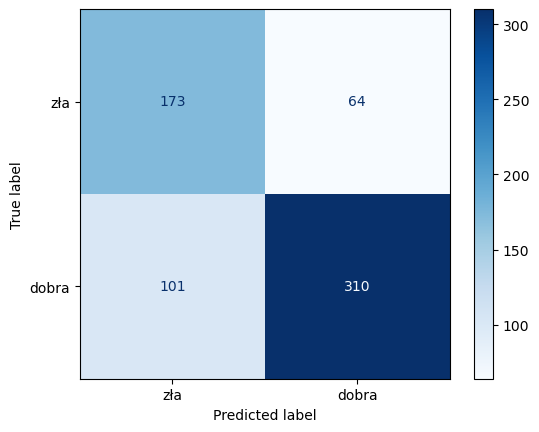

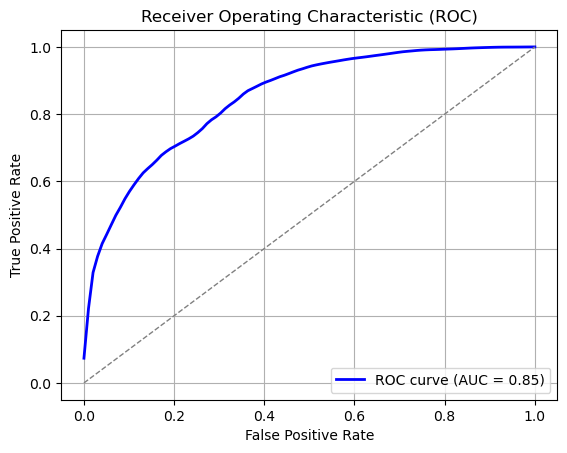

In [55]:
#################### RANDOM FOREST ID3/BAYES 50/50
importlib.reload(random_forest)
accuracies = []
time1 = time.time()

fpr_list = []
tpr_list = []
auc_list = []
y_testing = []
y_pred = []
for licznik in range(25):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random.randrange(200))
    rfc = random_forest.RandomForestClassifier(classifiers_number=50)
    rfc.fit(x_train, y_train, tree_percentage=0.5)

    samples = len(y_test)
    correctly_predicted = 0
    scores = [] #####################
    for sample, gt in zip(x_test, y_test):
        prediction = rfc.predict(sample)
        scores.append(prediction[1]) #############333
        y_pred.append(np.argmax(prediction))
        y_testing.append(gt)
        print(prediction, gt)
        if np.argmax(prediction) == gt:
            correctly_predicted += 1

    fpr, tpr, _ = roc_curve(y_test, scores)
    roc_auc = auc(fpr, tpr)
    # y_pred = np.array(y_pred)

    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(roc_auc)

    print(f"Accuracy: {(correctly_predicted / samples) * 100:.2f}%")
    print(f"Elapsed time: {time.time()-time1:.2f} s")
    accuracies.append((correctly_predicted / samples) * 100)
    print(f"Próbka numer {licznik+1}")
print(f"Mean accuracy: {np.mean(accuracies):.2f}%")
print(f"Accuracy min: {min(accuracies):.2f}%, max: {max(accuracies):.2f}%")
print(f"Accuracy standard deviation: {np.std(accuracies):.2f}%")



cm = confusion_matrix(y_testing, y_pred, labels=[0, 1])
cm = cm//25
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["zła", "dobra"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


# Define a common set of FPR values
mean_fpr = np.linspace(0, 1, 100)

# Interpolate TPR values
tpr_interp = [np.interp(mean_fpr, fpr, tpr) for fpr, tpr in zip(fpr_list, tpr_list)]

# Average the interpolated TPR values
mean_tpr = np.mean(tpr_interp, axis=0)

# Compute the mean AUC
mean_auc = np.mean(auc_list)


# Plot ROC curve
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f'ROC curve (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()